In [146]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split



In [147]:
X,y=make_blobs(n_samples=1000,centers=4,n_features=2,random_state=42,cluster_std=1.5)
blobs=pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"y":y})
blobs.tail(10)



,X1,X2,y
990,4.293477,3.017479,1
991,-3.768780,8.115197,0
992,5.101581,-0.592083,1
993,-8.477298,-7.337947,2
994,6.363789,0.918405,1
995,-3.787372,-5.067560,2
996,-1.573018,9.956804,0
997,3.215781,5.921743,1
998,-7.793895,-7.160567,2
999,-9.681580,7.009690,3


In [148]:
#turn data into tensors
x_blob=torch.from_numpy(X).type(torch.float)
y_blob=torch.from_numpy(y).type(torch.LongTensor)
x_blob[:10],y_blob[:10]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478]]),
 tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

In [149]:
#split data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_blob,y_blob,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

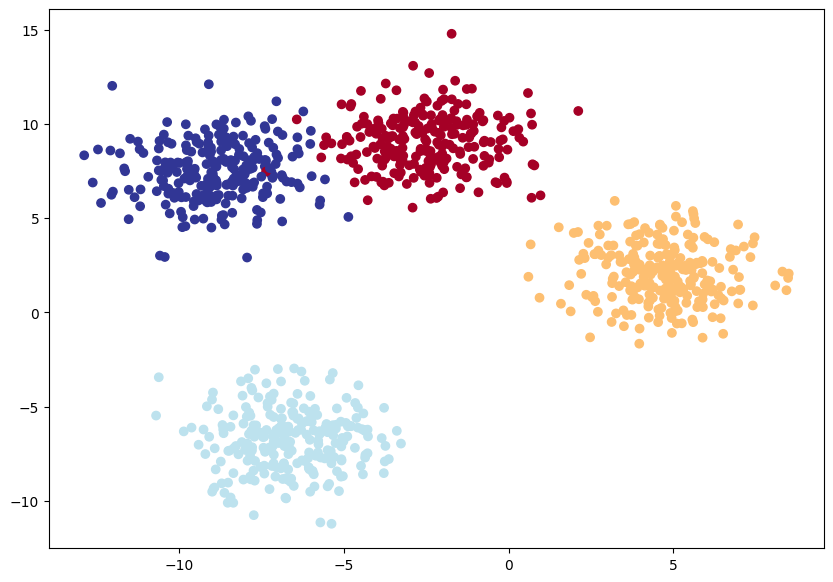

In [150]:
#plot data(visualize,visualize)
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)


In [151]:
#building a multi-class classification model
from torch import nn
class MultiClassBlobs(nn.Module):
  def __init__(self,input_features,output_features,hidden_units):
    super().__init__()
    self.Linear_layer=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features),

    )
  def forward(self,x):
    return self.Linear_layer(x)



In [152]:
model4=MultiClassBlobs(2,4,8)
model4

MultiClassBlobs(
  (Linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [153]:
#set up loss and optimization parameters
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model4.parameters(),lr=0.1)


In [154]:
model4.state_dict()

OrderedDict([('Linear_layer.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('Linear_layer.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('Linear_layer.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.2767, -0.2512,  0.022

In [155]:
#lets get some raw outputs of our model(logits)
model4.eval()
with torch.inference_mode():
  y_logits=model4(X_test)
y_logits[:5]


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [156]:
next(model4.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998]], requires_grad=True)

In [157]:
#conver our models logit outpus to prediction probabilities
y_pred_probs=torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [158]:
y_test[:5]

tensor([1, 3, 2, 1, 0])

In [159]:
sum(y_pred_probs[0])

tensor(1.0000)

In [160]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [161]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [162]:
#prediction probabilities to prediction label
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [163]:
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [164]:
#defin accuracy function
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc

In [178]:
#build training and testing loops
epochs=100
torch.manual_seed(42)
for epoch in range(epochs):
  model4.train()
  train_logits=model4(X_train)
  train_pred=torch.softmax(train_logits,dim=1).argmax(dim=1)
  train_loss=loss_fn(train_logits,y_train)
  train_acc=accuracy_fn(y_train,train_pred)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model4.eval()
  with torch.inference_mode():
    test_logits=model4(X_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_test,test_pred)


  if epoch%10==0:
    print(f"epoch:{epoch}| train_loss:{train_loss:.4f},acc:{train_acc:.2f}%|test_loss:{test_loss:.4f}, test_acc:{test_acc*100:.2f}%")



epoch:0| train_loss:0.0266,acc:0.99%|test_loss:0.0165, test_acc:99.50%
epoch:10| train_loss:0.0263,acc:0.99%|test_loss:0.0162, test_acc:99.50%
epoch:20| train_loss:0.0261,acc:0.99%|test_loss:0.0159, test_acc:99.50%
epoch:30| train_loss:0.0259,acc:0.99%|test_loss:0.0157, test_acc:99.50%
epoch:40| train_loss:0.0258,acc:0.99%|test_loss:0.0155, test_acc:99.50%
epoch:50| train_loss:0.0256,acc:0.99%|test_loss:0.0152, test_acc:99.50%
epoch:60| train_loss:0.0255,acc:0.99%|test_loss:0.0150, test_acc:99.50%
epoch:70| train_loss:0.0254,acc:0.99%|test_loss:0.0149, test_acc:99.50%
epoch:80| train_loss:0.0252,acc:0.99%|test_loss:0.0147, test_acc:99.50%
epoch:90| train_loss:0.0251,acc:0.99%|test_loss:0.0145, test_acc:99.50%


In [172]:
import requests
from pathlib import Path

# Check if helper_functions.py exists
if Path("helper_functions.py").is_file():
    print("Already exists")
else:
    print("Downloading...")
    response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(response.content)

# Correct import statement
from helper_functions import plot_predictions, plot_decision_boundary


Downloading...


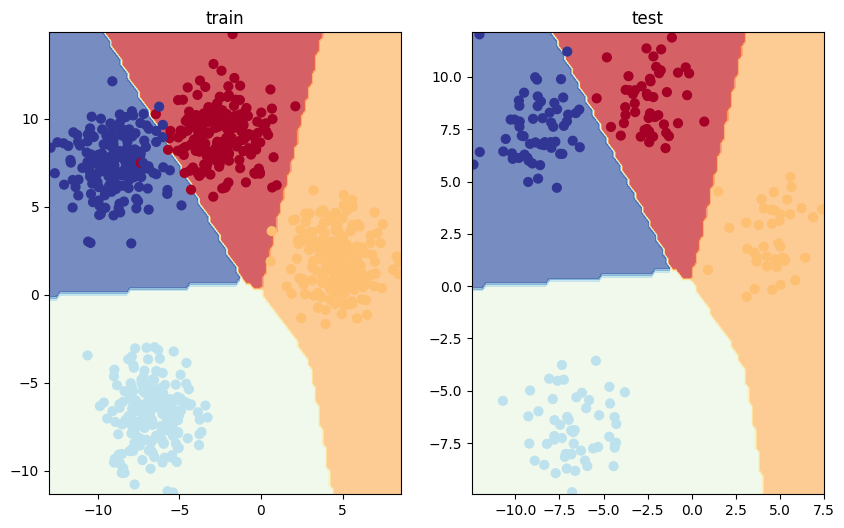

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model4,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model4,X_test,y_test)
plt.show()